PassengerId: 승객의 아이디

Survived: 생존 여부(0 과 1로 이루어져 있음)

Pclass : 티켓의 클래스 (1,2,3)

Sex: 성별

Age: 나이

SibSp: 함께 탑승한 형제와 배우자의 수

Parch: 함께 탑승한 부모, 아이의 수

Ticket: 티켓 번호

Fare: 탑승료

Cabin: 객실 번호

Embared: 탑승 항구

In [ ]:
#흔히 사용되는 모델 알고리즘
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#흔히 쓰이는 모델 보조 툴
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
%matplotlib inline

titanic_train = pd.read_csv("train.csv")
titanic_test = pd.read_csv("test.csv")

In [ ]:
print(titanic_train.head(7))
print("="*50)
print(titanic_test.head(7))

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S
5            6         0       3  ...   8.4583   NaN         Q
6            7         0       1  ...  51.8625   E46         S

[7 rows x 12 columns]
   PassengerId  Pclass  ... Cabin Embarked
0          892       3  ...   NaN        Q
1          893       3  ...   NaN        S
2          894       2  ...   NaN        Q
3          895       3  ...   NaN        S
4          896       3  ...   NaN        S
5          897       3  ...   NaN        S
6          898       3  ...   NaN        Q

[7 rows x 11 columns]


In [ ]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_train.sample(10) # 샘플 10개를 랜덤으로 추출

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,B77,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S
441,442,0,3,"Hampe, Mr. Leon",male,20.0,0,0,345769,9.5000,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C
222,223,0,3,"Green, Mr. George Henry",male,51.0,0,0,21440,8.0500,NaN,S
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,36947,78.2667,D20,C
395,396,0,3,"Johansson, Mr. Erik",male,22.0,0,0,350052,7.7958,NaN,S
392,393,0,3,"Gustafsson, Mr. Johan Birger",male,28.0,2,0,3101277,7.9250,NaN,S
639,640,0,3,"Thorneycroft, Mr. Percival",male,NaN,1,0,376564,16.1000,NaN,S


In [ ]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
titanic_train.isnull().sum() # 컬럼별 결측치 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_test.isnull().sum() # 확인한 결과 Cabin컬럼에는 결측치가 무수히 많기때문에 쓸모없는 컬럼으로 추청

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# 복사본을 만든다.
titanic_copy = titanic_train.copy(deep = True)
titanic_copy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic_df = [titanic_copy,titanic_test] # 묶음처리

In [ ]:
age_by_pclass_sex = titanic_copy.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(titanic_copy['Age'].median()))

Median age of Pclass 1 females: 35.0
Median age of Pclass 1 males: 40.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 30.0
Median age of Pclass 3 females: 21.5
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


In [ ]:
age_by_pclass_sex = titanic_test.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(titanic_test['Age'].median()))

Median age of Pclass 1 females: 41.0
Median age of Pclass 1 males: 42.0
Median age of Pclass 2 females: 24.0
Median age of Pclass 2 males: 28.0
Median age of Pclass 3 females: 22.0
Median age of Pclass 3 males: 24.0
Median age of all passengers: 27.0


In [ ]:
titanic_copy['Age'] = titanic_copy.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [ ]:
titanic_test['Age'] = titanic_test.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [ ]:
common_value = 'S'
for dataset in titanic_df:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [ ]:
med_fare = titanic_test.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
print(med_fare)
fare = [titanic_test]

for dataset in fare:
    dataset['Fare'] = dataset['Fare'].fillna(med_fare)

7.7958


In [ ]:
drop_column = ['PassengerId','Cabin', 'Ticket']
titanic_copy.drop(drop_column, axis=1, inplace = True)

In [ ]:
print(titanic_copy.isnull().sum())
print("="*40)
print(titanic_test.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [ ]:
titanic_copy['Name'] # , . 기준으로 나눈다.

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
titanic_copy['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [ ]:
pd.qcut(titanic_copy['Age'], 5).value_counts()
pd.qcut(titanic_copy['Fare'], 5).value_counts()

(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: Fare, dtype: int64

In [ ]:
for dataset in titanic_df:
  dataset['Title'] = dataset['Name'].str.split(',',expand=True)[1].str.split('.',expand=True)[0] # Name 전처리
  dataset['FamilySize'] = dataset['Parch']+dataset['SibSp']+1 # Parch,SibSp 전처리
  dataset['IsAlone'] = 1 #혼자일 경우 1
  dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # 1명이 이상일 경우 0

In [ ]:
#Age 전처리
for dataset in titanic_df:
    dataset['preAge'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['preAge'] <= 20, 'preAge'] = 0
    dataset.loc[(dataset['preAge'] > 20) & (dataset['preAge'] <= 25), 'preAge'] = 1
    dataset.loc[(dataset['preAge'] > 25) & (dataset['preAge'] <= 30), 'preAge'] = 2
    dataset.loc[(dataset['preAge'] > 30) & (dataset['preAge'] <= 40), 'preAge'] = 3
    dataset.loc[(dataset['preAge'] > 40) & (dataset['preAge'] <= 80), 'preAge'] = 4

In [ ]:
# Fare 전처리
for dataset in titanic_df:
    dataset['preFare'] = dataset['Fare'].astype(int)
    dataset.loc[ dataset['preFare'] <= 7.854, 'preFare'] = 0
    dataset.loc[(dataset['preFare'] > 7.854) & (dataset['preFare'] <= 10.5), 'preFare'] = 1
    dataset.loc[(dataset['preFare'] > 10.5) & (dataset['preFare'] <= 21.679), 'preFare'] = 2
    dataset.loc[(dataset['preFare'] > 21.679) & (dataset['preFare'] <= 39.688), 'preFare'] = 3
    dataset.loc[(dataset['preFare'] > 39.688) & (dataset['preFare'] <= 513), 'preFare'] = 4

In [ ]:
titanic_test['Age'].value_counts()

24.0    68
22.0    38
21.0    17
30.0    15
18.0    13
        ..
60.5     1
26.5     1
76.0     1
67.0     1
34.5     1
Name: Age, Length: 79, dtype: int64

In [ ]:
print(dataset['Title'].value_counts())
print('='*30)
print(dataset['FamilySize'])
print('='*30)
print(dataset['IsAlone'])

 Mr        240
 Miss       78
 Mrs        72
 Master     21
 Col         2
 Rev         2
 Dr          1
 Ms          1
 Dona        1
Name: Title, dtype: int64
0      1
1      2
2      1
3      1
4      3
      ..
413    1
414    1
415    1
416    1
417    3
Name: FamilySize, Length: 418, dtype: int64
0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    1
415    1
416    1
417    0
Name: IsAlone, Length: 418, dtype: int64


In [ ]:
print(dataset['preAge'])
print(dataset['preFare'])
print(titanic_copy['preFare'].value_counts())

0      3
1      4
2      4
3      2
4      1
      ..
413    1
414    3
415    3
416    1
417    1
Name: preAge, Length: 418, dtype: int64
0      0
1      0
2      1
3      1
4      2
      ..
413    1
414    4
415    0
416    1
417    3
Name: preFare, Length: 418, dtype: int64
0    241
3    180
4    176
2    171
1    123
Name: preFare, dtype: int64


In [ ]:
print(titanic_copy['Title'].value_counts())
print(titanic_test['Title'].value_counts())

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Major             2
 Mlle              2
 Don               1
 Jonkheer          1
 the Countess      1
 Ms                1
 Capt              1
 Lady              1
 Mme               1
 Sir               1
Name: Title, dtype: int64
 Mr        240
 Miss       78
 Mrs        72
 Master     21
 Col         2
 Rev         2
 Dr          1
 Ms          1
 Dona        1
Name: Title, dtype: int64


In [ ]:
# Title 전처리
pre_min = 10 # 10 이하의 희소한 직위를 뽑아내기 위해
title_names = (titanic_copy['Title'].value_counts() < pre_min) 
titanic_copy['Title'] = titanic_copy['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(titanic_copy['Title'].value_counts())

 Mr        517
 Miss      182
 Mrs       125
 Master     40
Misc        27
Name: Title, dtype: int64


In [ ]:
titanic_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    object 
 3   Sex         891 non-null    object 
 4   Age         891 non-null    float64
 5   SibSp       891 non-null    int64  
 6   Parch       891 non-null    int64  
 7   Fare        891 non-null    float64
 8   Embarked    891 non-null    object 
 9   Title       891 non-null    object 
 10  FamilySize  891 non-null    int64  
 11  IsAlone     891 non-null    int64  
 12  preAge      891 non-null    int64  
 13  preFare     891 non-null    int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 97.6+ KB


In [ ]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Title        418 non-null    object 
 12  FamilySize   418 non-null    int64  
 13  IsAlone      418 non-null    int64  
 14  preAge       418 non-null    int64  
 15  preFare      418 non-null    int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 52.4+ KB


In [ ]:
titanic_copy.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,preAge,preFare
563,0,3,"Simmons, Mr. John",male,25.0,0,0,8.0500,S,Mr,1,1,1,1
786,1,3,"Sjoblom, Miss. Anna Sofia",female,18.0,0,0,7.4958,S,Miss,1,1,0,0
306,1,1,"Fleming, Miss. Margaret",female,35.0,0,0,110.8833,C,Miss,1,1,3,4
652,0,3,"Kalvik, Mr. Johannes Halvorsen",male,21.0,0,0,8.4333,S,Mr,1,1,1,1
194,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,27.7208,C,Mrs,1,1,4,3


In [ ]:
titanic_test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,preAge,preFare
329,1221,2,"Enander, Mr. Ingvar",male,21.0,0,0,236854,13.0000,NaN,S,Mr,1,1,1,2
134,1026,3,"Dintcheff, Mr. Valtcho",male,43.0,0,0,349226,7.8958,NaN,S,Mr,1,1,4,0
276,1168,2,"Parker, Mr. Clifford Richard",male,28.0,0,0,SC 14888,10.5000,NaN,S,Mr,1,1,2,1
387,1279,2,"Ashby, Mr. John",male,57.0,0,0,244346,13.0000,NaN,S,Mr,1,1,4,2
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1,1,3,0


In [ ]:
#code categorical data
label = LabelEncoder()
for dataset in titanic_df:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['preAge_Code'] = label.fit_transform(dataset['preAge'])
    dataset['preFare_Code'] = label.fit_transform(dataset['preFare'])

In [ ]:
#define y variable aka target/outcome
#y변수(목표 변수)를 설정하기

Target = ['Survived']

#define x variables for original features aka feature selection
#x변수 설정하기. feature selection이라고도 한다.

data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone']
#pretty name/values for charts
#차트를 위해 이름/값을 예쁘게 만들어주기

data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare']
#coded for algorithm calculation
#알고리즘 계산을 위해 코드화 됨
data1_xy =  Target + data1_x
print('Original X Y: ', data1_xy, '\n')


#define x variables for original w/bin features to remove continuous variables
#연속형 변수들을 제거하기 위해 x 변수들을 정의
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'preAge_Code', 'preFare_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')

#define x and y variables for dummy features original
#더미 변수들을 위해 x와 y변수 정의

data1_dummy = pd.get_dummies(titanic_copy[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')



data1_dummy.head()
print(data1_x_dummy)

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'preAge_Code', 'preFare_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_ Master', 'Title_ Miss', 'Title_ Mr', 'Title_ Mrs', 'Title_Misc'] 

['Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_ Master', 'Title_ Miss', 'Title_ Mr', 'Title_ Mrs', 'Title_Misc']


In [ ]:
print('Train columns with null values: \n', titanic_copy.isnull().sum())
print("-"*10)
print (titanic_copy.info())
print("-"*10)

print('Test/Validation columns with null values: \n', titanic_test.isnull().sum())
print("-"*10)
print (titanic_test.info())
print("-"*10)

titanic_train.describe(include = 'all')

Train columns with null values: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Title            0
FamilySize       0
IsAlone          0
preAge           0
preFare          0
Sex_Code         0
Embarked_Code    0
Title_Code       0
preAge_Code      0
preFare_Code     0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Name           891 non-null    object 
 3   Sex            891 non-null    object 
 4   Age            891 non-null    float64
 5   SibSp          891 non-null    int64  
 6   Parch          891 non-null    int64  
 7   Fare           891 non-null    float64
 8   Embarked       891 non-null    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Barton, Mr. David John",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
#split train and test data with function defaults
#학습과 테스트 데이터를 기본값이 설정된 함수로 분할
#random_state -> seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
#random_state -> seed 혹은 통제 무작위 수 생성기
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(titanic_copy[data1_x_calc], titanic_copy[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(titanic_copy[data1_x_bin], titanic_copy[Target] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], titanic_copy[Target], random_state = 0)


print("Data1 Shape: {}".format(titanic_copy.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x_bin.head()

Data1 Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,preAge_Code,preFare_Code
105,1,3,2,2,1,2,0
68,0,3,2,1,7,0,0
253,1,3,2,2,2,2,2
320,1,3,2,2,1,1,0
706,0,2,2,3,1,4,2


시각화

In [ ]:
#Discrete Variable Correlation by Survival using
#생존여부별 이산 변수 상관관계

#group by aka pivot table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html
#피벗테이블 별 그룹
for x in data1_x:
    if titanic_copy[x].dtype != 'float64' :
        print('Survival Correlation by:', x)
        print(titanic_copy[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')
        

#using crosstabs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html
#크로스탭 사용하기
print(pd.crosstab(titanic_copy['Title'],titanic_copy[Target[0]]))

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correlation by: Title
     Title  Survived
0   Master  0.575000
1     Miss  0.697802
2       Mr  0.156673
3      Mrs  0.792000
4     Misc  0.444444
---------- 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 

Survival Correlation by: FamilySize
   FamilySize  Survived
0           1  0.303

In [ ]:
for x in data1_x:
    if titanic_copy[x].dtype != 'float64':
        print('Survival Crosstab by : x')
        print(pd.crosstab(titanic_copy[x],titanic_copy[Target[0]]))
        print('-'*10, '\n')

Survival Crosstab by : x
Survived    0    1
Sex               
female     81  233
male      468  109
---------- 

Survival Crosstab by : x
Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119
---------- 

Survival Crosstab by : x
Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  219
---------- 

Survival Crosstab by : x
Survived    0    1
Title             
 Master    17   23
 Miss      55  127
 Mr       436   81
 Mrs       26   99
Misc       15   12
---------- 

Survival Crosstab by : x
Survived    0    1
SibSp             
0         398  210
1          97  112
2          15   13
3          12    4
4          15    3
5           5    0
8           7    0
---------- 

Survival Crosstab by : x
Survived    0    1
Parch             
0         445  233
1          53   65
2          40   40
3           2    3
4           4    0
5           4    1
6           1    0
---------- 

Survival Crosstab by : x
Surviv

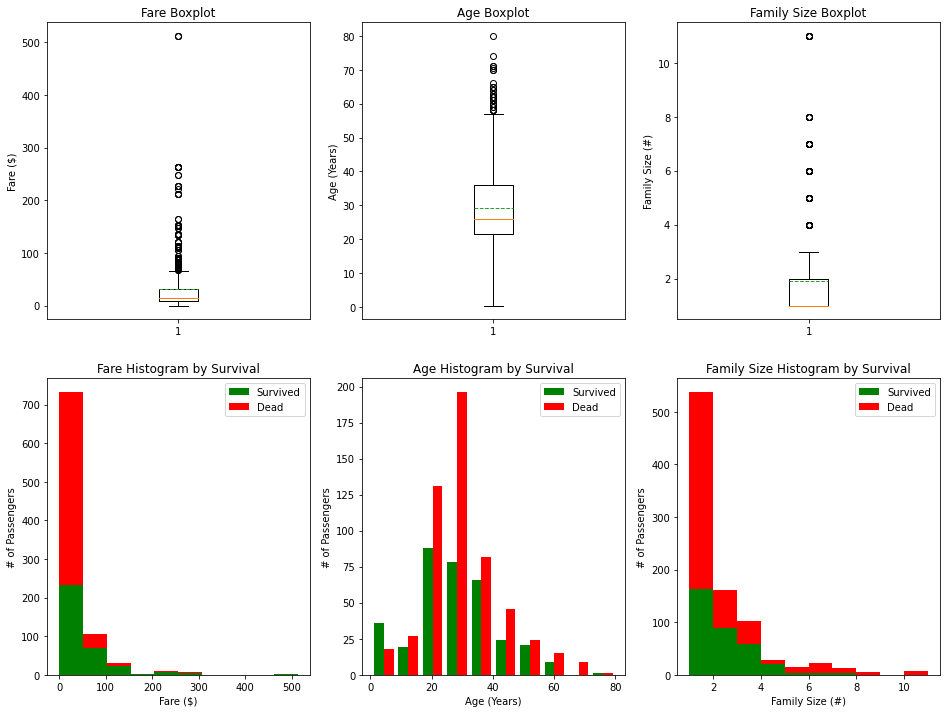

In [ ]:
#IMPORTANT: Intentionally plotted different ways for learning purposes only. 
#중요: 보고 배우라는 목적으로, 일부러 다른 방식으로 플로팅했습니다.

#optional plotting w/pandas: https://pandas.pydata.org/pandas-docs/stable/visualization.html
#판다스를 이용한 조건적 플로팅

#we will use matplotlib.pyplot: https://matplotlib.org/api/pyplot_api.html
#우리는 matplotlib.pyplot을 사용할 것

#to organize our graphics will use figure: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
#우리의 그래픽을 구성하기 위해 figure를 사용할 것

#subplot: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html#matplotlib.pyplot.subplot
#and subplotS: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html?highlight=matplotlib%20pyplot%20subplots#matplotlib.pyplot.subplots

#graph distribution of quantitative data
#분포와 정량적 데이터를 그래프화
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=titanic_copy['Fare'], showmeans = True, meanline = True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(232)
plt.boxplot(titanic_copy['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(233)
plt.boxplot(titanic_copy['FamilySize'], showmeans = True, meanline = True)
plt.title('Family Size Boxplot')
plt.ylabel('Family Size (#)')

plt.subplot(234)
plt.hist(x = [titanic_copy[titanic_copy['Survived']==1]['Fare'], titanic_copy[titanic_copy['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(235)
plt.hist(x = [titanic_copy[titanic_copy['Survived']==1]['Age'], titanic_copy[titanic_copy['Survived']==0]['Age']], 
         stacked=False, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x = [titanic_copy[titanic_copy['Survived']==1]['FamilySize'], titanic_copy[titanic_copy['Survived']==0]['FamilySize']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size (#)')
plt.ylabel('# of Passengers')
plt.legend()

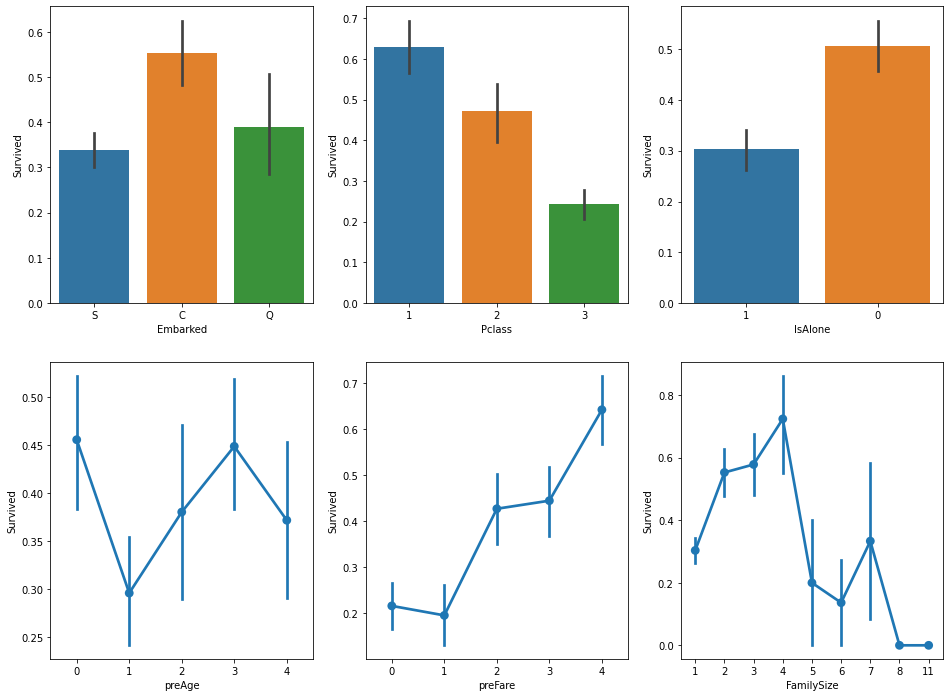

In [ ]:
#we will use seaborn graphics for multi-variable comparison: https://seaborn.pydata.org/api.html
#다변수 비교를 위해 seaborn 그래픽을 사용

#graph individual features by survival
#생존별 개인 특징을 시각화
fig, saxis = plt.subplots(2, 3,figsize=(16,12))

sns.barplot(x = 'Embarked', y = 'Survived', data=titanic_copy, ax = saxis[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=titanic_copy, ax = saxis[0,1])
sns.barplot(x = 'IsAlone', y = 'Survived', order=[1,0], data=titanic_copy, ax = saxis[0,2])

sns.pointplot(x = 'preFare', y = 'Survived',  data=titanic_copy, ax = saxis[1,1])
sns.pointplot(x = 'preAge', y = 'Survived',  data=titanic_copy, ax = saxis[1,0])
sns.pointplot(x = 'FamilySize', y = 'Survived', data=titanic_copy, ax = saxis[1,2])

Text(0.5, 1.0, 'Pclass vs Family Size Survival Comparison')

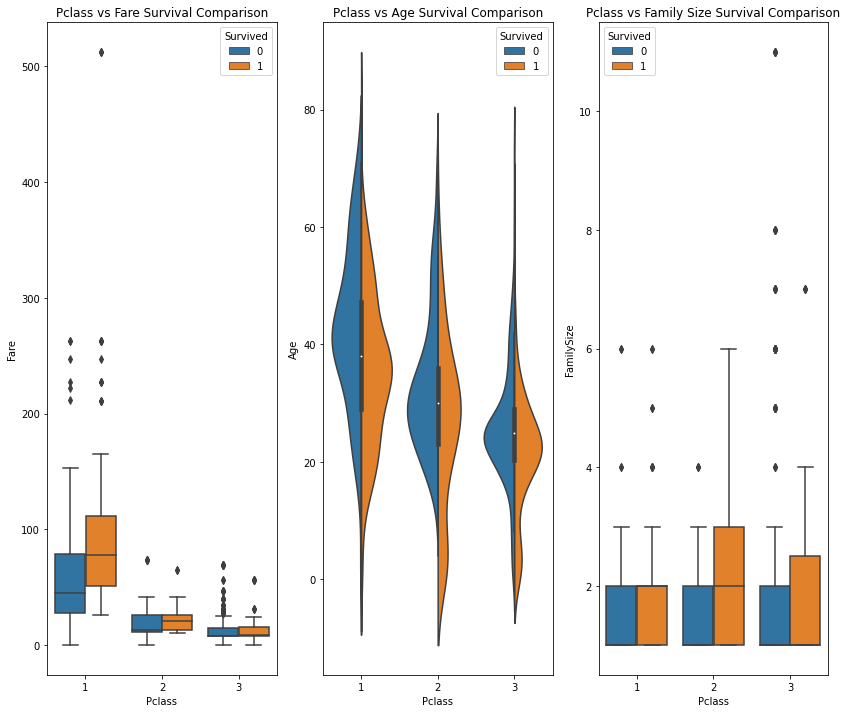

In [ ]:
#graph distribution of qualitative data: Pclass
#분포와 정량적 데이터를 시각화 : Pclass
#we know class mattered in survival, now let's compare class and a 2nd feature
#사회적 지위가 생존에 중요하다는 것을 알고 있음으로, 클래스와 두번째 특징을 비교하자
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,12))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = titanic_copy, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = titanic_copy, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = titanic_copy, ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

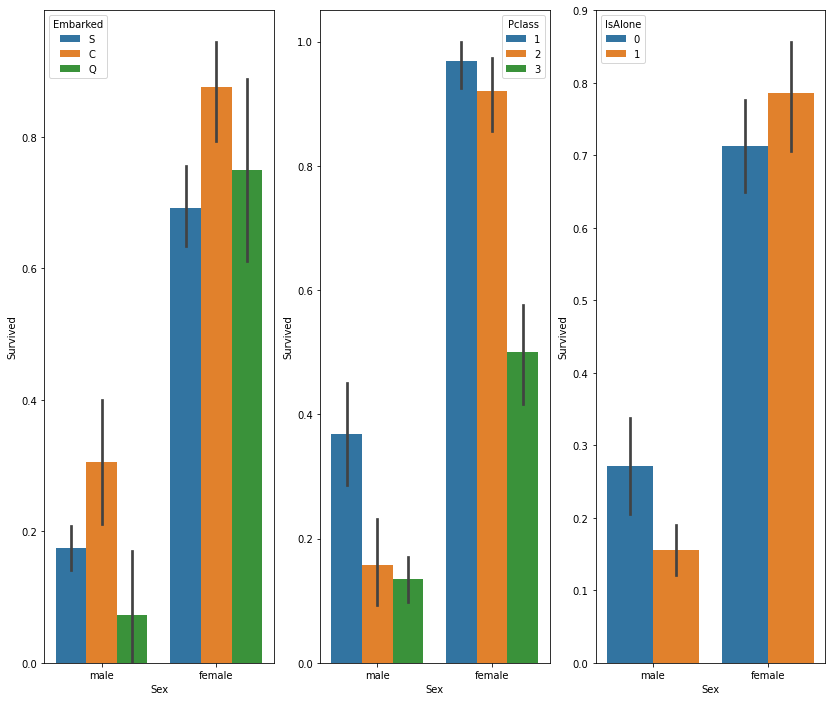

In [ ]:
#graph distribution of qualitative data: Sex

#we know sex mattered in survival, now let's compare sex and a 2nd feature

fig, qaxis = plt.subplots(1,3,figsize=(14,12))

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=titanic_copy, ax = qaxis[0])


sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=titanic_copy, ax  = qaxis[1])


sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone', data=titanic_copy, ax  = qaxis[2])

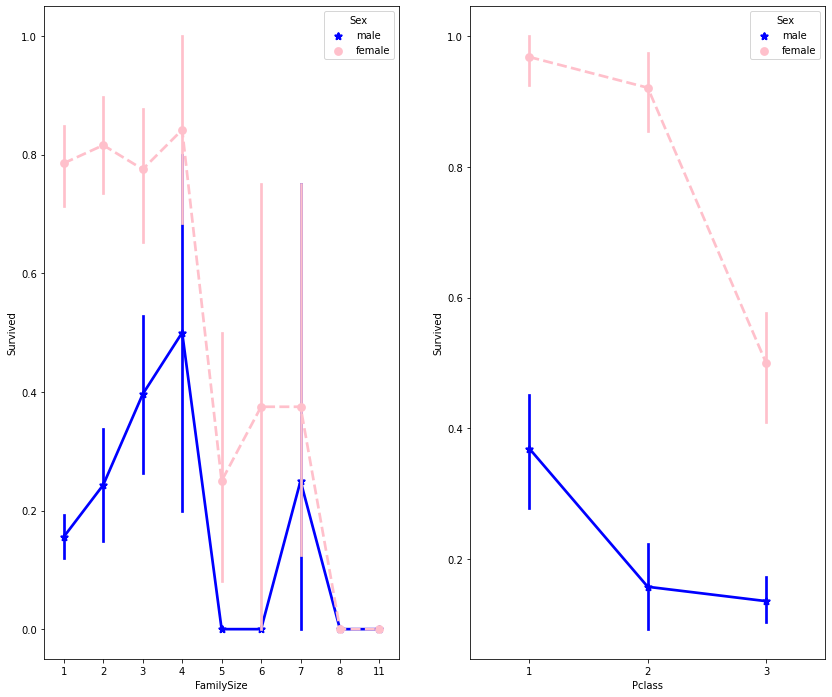

In [ ]:
#more side-by-side comparisons
#더 다양한 side-by-side 비교

fig, (maxis1, maxis2) = plt.subplots(1, 2,figsize=(14,12))

#how does family size factor with sex & survival compare
#가족 규모가 성별/생존 비교에 요인이 되는가

sns.pointplot(x="FamilySize", y="Survived", hue="Sex", data=titanic_copy,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis1)

#how does class factor with sex & survival compare
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=titanic_copy,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis2)

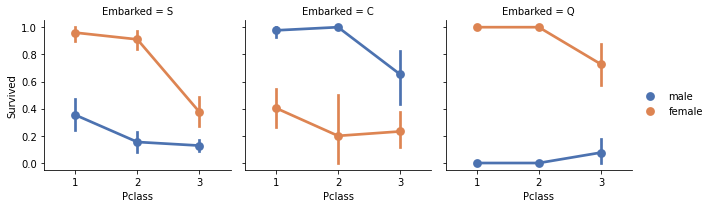

In [ ]:
#how does embark port factor with class, sex, and survival compare
#facetgrid: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
e = sns.FacetGrid(titanic_copy, col = 'Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette = 'deep')
e.add_legend()

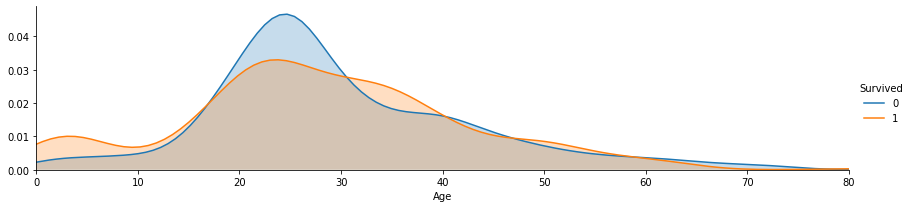

In [ ]:
#plot distributions of age of passengers who survived or did not survive
#생존한 승객과 사망한 승객들의 나이의 분포를 시각화

a = sns.FacetGrid(titanic_copy, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , titanic_copy['Age'].max()))
a.add_legend()

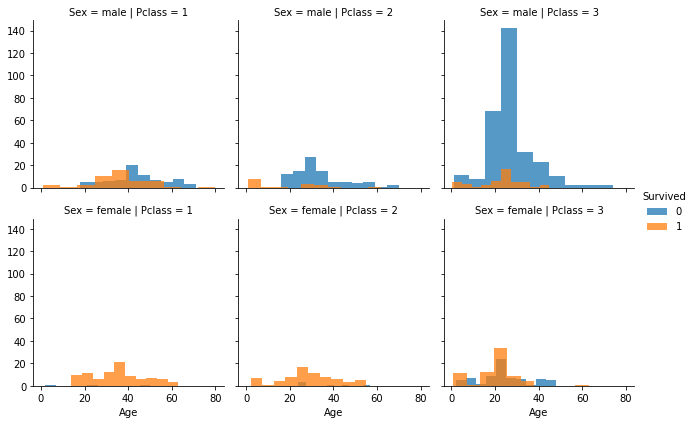

In [ ]:
#histogram comparison of sex, class, and age by survival
#생존별 성별, 지위, 나이를 히스토그램으로 비교
h = sns.FacetGrid(titanic_copy, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()

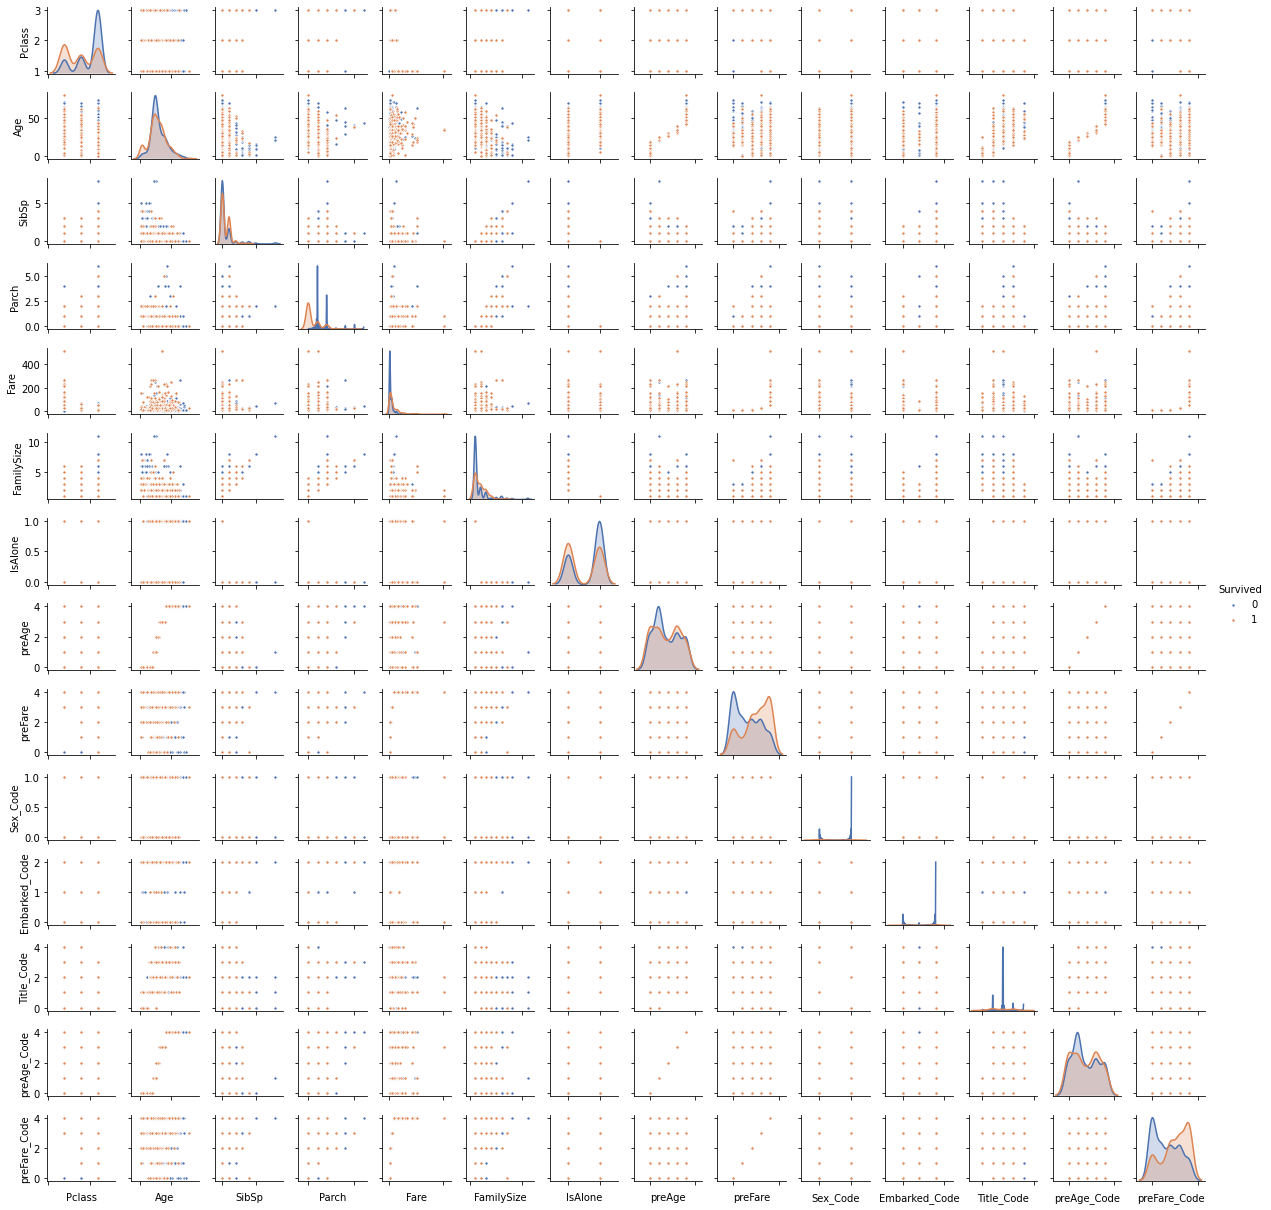

In [ ]:
#pair plots of entire dataset
#전체 데이터셋의 그림들을 짝짓기
pp = sns.pairplot(titanic_copy, hue = 'Survived', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

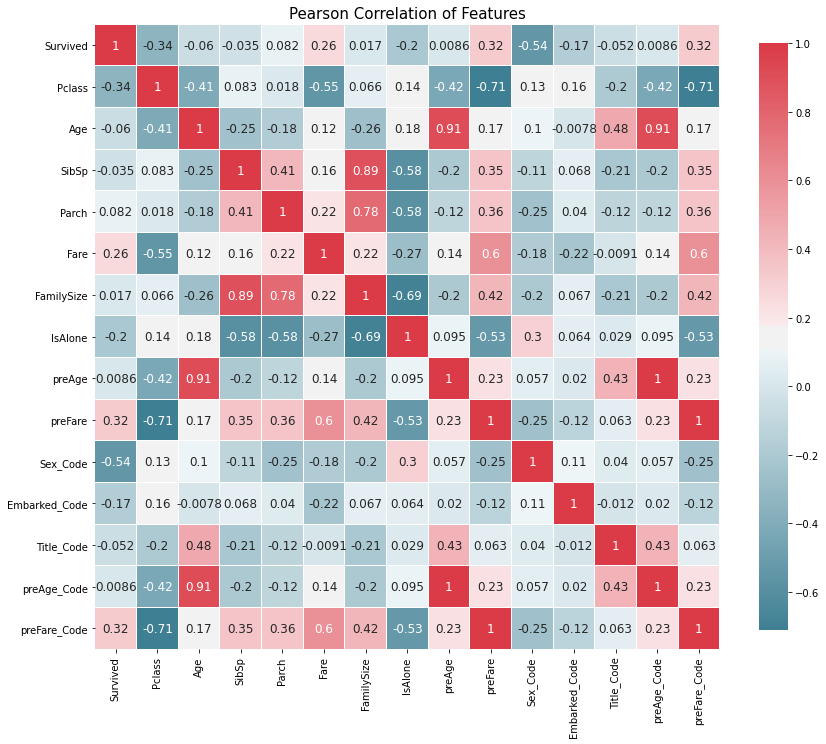

In [ ]:
#correlation heatmap of dataset
#데이터셋의 상관관계 히트맵

def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(titanic_copy)

In [ ]:
titanic_copy.sample(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,preAge,preFare,Sex_Code,Embarked_Code,Title_Code,preAge_Code,preFare_Code
344,0,2,"Fox, Mr. Stanley Hubert",male,36.0,0,0,13.0,S,Mr,1,1,3,2,1,2,2,3,2
438,0,1,"Fortune, Mr. Mark",male,64.0,1,4,263.0,S,Mr,6,0,4,4,1,2,2,4,4


In [ ]:
titanic_test.sample(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,preAge,preFare,Sex_Code,Embarked_Code,Title_Code,preAge_Code,preFare_Code
187,1079,3,"Davies, Mr. Joseph",male,17.0,2,0,A/4 48873,8.0500,NaN,S,Mr,3,0,0,1,1,2,5,0,1
35,927,3,"Katavelas, Mr. Vassilios (Catavelas Vassilios"")""",male,18.5,0,0,2682,7.2292,NaN,C,Mr,1,1,0,0,1,0,5,0,0


In [ ]:
titanic_copy = titanic_copy.drop(['Name','Fare','Age','SibSp','Parch','Embarked','Title','preAge','preFare','Sex'],axis=1)
titanic_test = titanic_test.drop(['PassengerId','Name','Fare','Ticket','Age','Cabin','SibSp','Parch','Embarked','Title','preAge','preFare','Sex'],axis=1)

In [ ]:
titanic_copy.sample(1)

,Survived,Pclass,FamilySize,IsAlone,Sex_Code,Embarked_Code,Title_Code,preAge_Code,preFare_Code
438,0,1,6,0,1,2,2,4,4


In [ ]:
titanic_test.sample(1)

,Pclass,FamilySize,IsAlone,Sex_Code,Embarked_Code,Title_Code,preAge_Code,preFare_Code
138,3,1,1,0,2,4,1,1


In [ ]:
y_titanic_df = titanic_copy['Survived']
X_titanic_df= titanic_copy.drop('Survived',axis=1)

X_titanic_df.head()

,Pclass,FamilySize,IsAlone,Sex_Code,Embarked_Code,Title_Code,preAge_Code,preFare_Code
0,3,2,0,1,2,2,1,0
1,1,2,0,0,0,3,3,4
2,3,1,1,0,2,1,2,0
3,1,2,0,0,2,3,3,4
4,3,1,1,1,2,2,3,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df,test_size=0.2, random_state=11)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(max_iter=300)
svc_clf = SVC()

dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
dt_score= accuracy_score(y_test, dt_pred)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(dt_score))

rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
rf_score= accuracy_score(y_test, rf_pred)
print('RandomForestClassifier 정확도:{0:.4f}'.format(rf_score))

lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
lr_score= accuracy_score(y_test, lr_pred)
print('LogisticRegression 정확도: {0:.4f}'.format(lr_score))

svc_clf.fit(X_train , y_train)
svc_pred = svc_clf.predict(X_test)
svc_score= accuracy_score(y_test, svc_pred)
print('SVC 정확도: {0:.4f}'.format(svc_score))

DecisionTreeClassifier 정확도: 0.8045
RandomForestClassifier 정확도:0.8156
LogisticRegression 정확도: 0.8436
SVC 정확도: 0.8715


In [ ]:
# 그래프 추가 안함 dt 소속
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))

exec_kfold(dt_clf , folds=5)

교차 검증 0 정확도: 0.7821
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.8034
교차 검증 3 정확도: 0.7640
교차 검증 4 정확도: 0.8371
평균 정확도: 0.7924


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df , y_titanic_df , cv=5)
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

cross_val_score_mean_score = np.mean(scores)
print("평균 정확도: {0:.4f}".format(cross_val_score_mean_score))

교차 검증 0 정확도: 0.7654
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.8090
교차 검증 3 정확도: 0.7753
교차 검증 4 정확도: 0.8258
평균 정확도: 0.7902


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('best_params_ : ',grid_dclf.best_params_)
print('best_score_: ', grid_dclf.best_score_)

best_dclf = grid_dclf.best_estimator_
pred = best_dclf.predict(X_test)
grid_score = accuracy_score(y_test , pred)
print('accuracy: ', grid_score)

best_params_ :  {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 2}
best_score_:  0.8300502314586822
accuracy:  0.8324022346368715


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.8659
GBM 수행 시간: 0.1 초 


In [ ]:
xclf = XGBClassifier()
xclf.fit(X_train, y_train, eval_metric='auc', verbose=True)
xgb_pred = xclf.predict(X_test)
xgb_score = accuracy_score(y_test, xgb_pred)
print("score:", xgb_score, "%")

score: 0.8715083798882681 %


In [ ]:
xclf1 = XGBClassifier(booster='dart', min_split_loss = 1, max_depth= 7)
xclf1.fit(X_train, y_train, eval_metric='auc', verbose=True)
xgb_pred = xclf1.predict(X_test)
xgb_score1 = accuracy_score(y_test, xgb_pred)
print("score:", xgb_score1, "%")

score: 0.8770949720670391 %


In [ ]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, y_train)

percep_pred = perceptron.predict(X_test)

percep_score = accuracy_score(y_test, percep_pred)
print("score:", percep_score, "%")

score: 0.7039106145251397 %


In [ ]:
gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)  
nb_pred = gaussian.predict(X_test)  
nb_score = accuracy_score(y_test, nb_pred)
print("score:", nb_score, "%")

score: 0.8044692737430168 %


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5) 
knn.fit(X_train, y_train)  
knn_pred = knn.predict(X_test)  
knn_score1 = accuracy_score(y_test, knn_pred)
print("score:", knn_score1, "%")

score: 0.8212290502793296 %


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)  
knn_pred = knn.predict(X_test)  
knn_score = accuracy_score(y_test, knn_pred)
print("score:", knn_score, "%")

score: 0.8435754189944135 %


In [ ]:
#area for Model Score visual
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN_3 ', 'KNN_5', 'Logistic Regression', 
              'Random Forest', 'Gaussian', 'Perceptron', 'XGB Classifier',
              'Decision Tree','cross_val','GridSearchCV','GradientBoosting'],
    'Score': [svc_score, knn_score, knn_score1, lr_score, 
              rf_score, nb_score, percep_score, xgb_score1, dt_score,cross_val_score_mean_score,grid_score,gb_accuracy]})
result_df = results.sort_values(by='Score', ascending=False)
#result_df = result_df.set_index('Score')
result_df.head(12)

,Model,Score
7,XGB Classifier,0.877095
0,Support Vector Machines,0.871508
11,GradientBoosting,0.865922
1,KNN_3,0.843575
3,Logistic Regression,0.843575
10,GridSearchCV,0.832402
2,KNN_5,0.821229
4,Random Forest,0.815642
5,Gaussian,0.804469
8,Decision Tree,0.804469


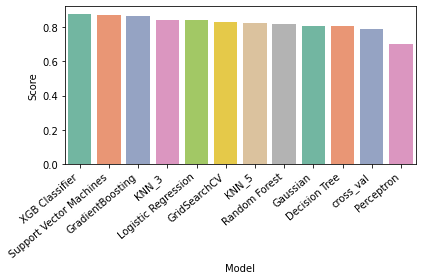

In [ ]:
#연습
ax = sns.barplot(x="Model", y="Score", data=result_df, palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
#연습
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(xclf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(8)

,importance
feature,
Sex_Code,0.641
Pclass,0.159
Title_Code,0.062
FamilySize,0.059
Embarked_Code,0.035
preFare_Code,0.028
preAge_Code,0.017
IsAlone,0.000


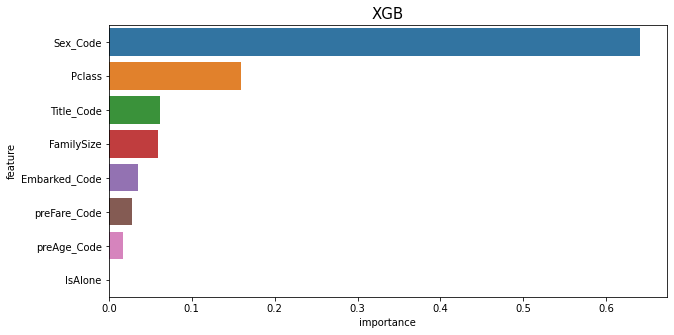

In [ ]:
#연습
plt.figure(figsize=(10, 5))
sns.barplot(x='importance', y=importances.index, data=importances)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.title('XGB', size=15)

plt.show()

In [ ]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

evals = [(X_test, y_test)]

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train , y_train,  early_stopping_rounds=400,eval_set=evals, eval_metric="logloss",  verbose=True)

w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.641348
Will train until validation_0-logloss hasn't improved in 400 rounds.
[1]	validation_0-logloss:0.598277
[2]	validation_0-logloss:0.562582
[3]	validation_0-logloss:0.532109
[4]	validation_0-logloss:0.506539
[5]	validation_0-logloss:0.483599
[6]	validation_0-logloss:0.464144
[7]	validation_0-logloss:0.450627
[8]	validation_0-logloss:0.435351
[9]	validation_0-logloss:0.422332
[10]	validation_0-logloss:0.411547
[11]	validation_0-logloss:0.403413
[12]	validation_0-logloss:0.394453
[13]	validation_0-logloss:0.386623
[14]	validation_0-logloss:0.379465
[15]	validation_0-logloss:0.373698
[16]	validation_0-logloss:0.369632
[17]	validation_0-logloss:0.364977
[18]	validation_0-logloss:0.360929
[19]	validation_0-logloss:0.357605
[20]	validation_0-logloss:0.355179
[21]	validation_0-logloss:0.352356
[22]	validation_0-logloss:0.349988
[23]	validation_0-logloss:0.348556
[24]	validation_0-logloss:0.347541
[25]	validation_0-logloss:0.346449
[26]	validation_0-logloss:0.344

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
get_clf_eval(y_test , w_preds, w_pred_proba)

오차 행렬
[[110   8]
 [ 14  47]]
정확도: 0.8771, 정밀도: 0.8545, 재현율: 0.7705,    F1: 0.8103, AUC:0.9271


In [ ]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)

evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", 
                eval_set=evals, verbose=True)

ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.641348
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.598277
[2]	validation_0-logloss:0.562582
[3]	validation_0-logloss:0.532109
[4]	validation_0-logloss:0.506539
[5]	validation_0-logloss:0.483599
[6]	validation_0-logloss:0.464144
[7]	validation_0-logloss:0.450627
[8]	validation_0-logloss:0.435351
[9]	validation_0-logloss:0.422332
[10]	validation_0-logloss:0.411547
[11]	validation_0-logloss:0.403413
[12]	validation_0-logloss:0.394453
[13]	validation_0-logloss:0.386623
[14]	validation_0-logloss:0.379465
[15]	validation_0-logloss:0.373698
[16]	validation_0-logloss:0.369632
[17]	validation_0-logloss:0.364977
[18]	validation_0-logloss:0.360929
[19]	validation_0-logloss:0.357605
[20]	validation_0-logloss:0.355179
[21]	validation_0-logloss:0.352356
[22]	validation_0-logloss:0.349988
[23]	validation_0-logloss:0.348556
[24]	validation_0-logloss:0.347541
[25]	validation_0-logloss:0.346449
[26]	validation_0-logloss:0.3445

In [ ]:
import lightgbm
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정. 
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                 eval_set=evals, verbose=True)

preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	valid_0's binary_logloss: 0.602026	valid_0's binary_logloss: 0.602026
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.565257	valid_0's binary_logloss: 0.565257
[3]	valid_0's binary_logloss: 0.534256	valid_0's binary_logloss: 0.534256
[4]	valid_0's binary_logloss: 0.50853	valid_0's binary_logloss: 0.50853
[5]	valid_0's binary_logloss: 0.487551	valid_0's binary_logloss: 0.487551
[6]	valid_0's binary_logloss: 0.469247	valid_0's binary_logloss: 0.469247
[7]	valid_0's binary_logloss: 0.453796	valid_0's binary_logloss: 0.453796
[8]	valid_0's binary_logloss: 0.43876	valid_0's binary_logloss: 0.43876
[9]	valid_0's binary_logloss: 0.426258	valid_0's binary_logloss: 0.426258
[10]	valid_0's binary_logloss: 0.415211	valid_0's binary_logloss: 0.415211
[11]	valid_0's binary_logloss: 0.405512	valid_0's binary_logloss: 0.405512
[12]	valid_0's binary_logloss: 0.397656	valid_0's binary_logloss: 0.397656
[13]	valid_0's binary_logloss: 0.390883	valid_0's 

In [ ]:
get_clf_eval(y_test , ws100_preds, ws100_pred_proba) # XGBClassifier

오차 행렬
[[112   6]
 [ 17  44]]
정확도: 0.8715, 정밀도: 0.8800, 재현율: 0.7213,    F1: 0.7928, AUC:0.9237


In [ ]:
get_clf_eval(y_test, preds, pred_proba) # LightGBM

오차 행렬
[[111   7]
 [ 15  46]]
정확도: 0.8771, 정밀도: 0.8679, 재현율: 0.7541,    F1: 0.8070, AUC:0.9153


In [ ]:
lr_clf.fit(X_train , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
prediction = lr_clf.predict(titanic_test)

In [ ]:
test_Passenger = pd.read_csv('test.csv')
submission = pd.DataFrame({"PassengerId":test_Passenger["PassengerId"], "Survived" : prediction})
submission.to_csv('submission(lr_clf).csv', index=False)

In [ ]:
submission = pd.read_csv('gender_submission.csv')
print(submission)
print(submission.shape)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
(418, 2)


In [ ]:
titanic_copy.shape

(891, 9)

In [ ]:
titanic_test.shape

(418, 8)